In [44]:
!pip install opencv-python

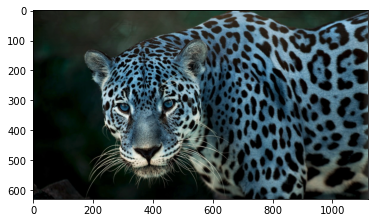

In [45]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np 
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io

image = cv2.imread('ois.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 3)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('ois2.jpg', quant)
plt.imshow(image)

cv2.imread('ois.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

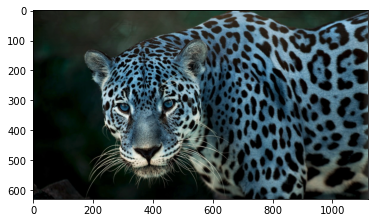

In [46]:
plt.imshow(image)

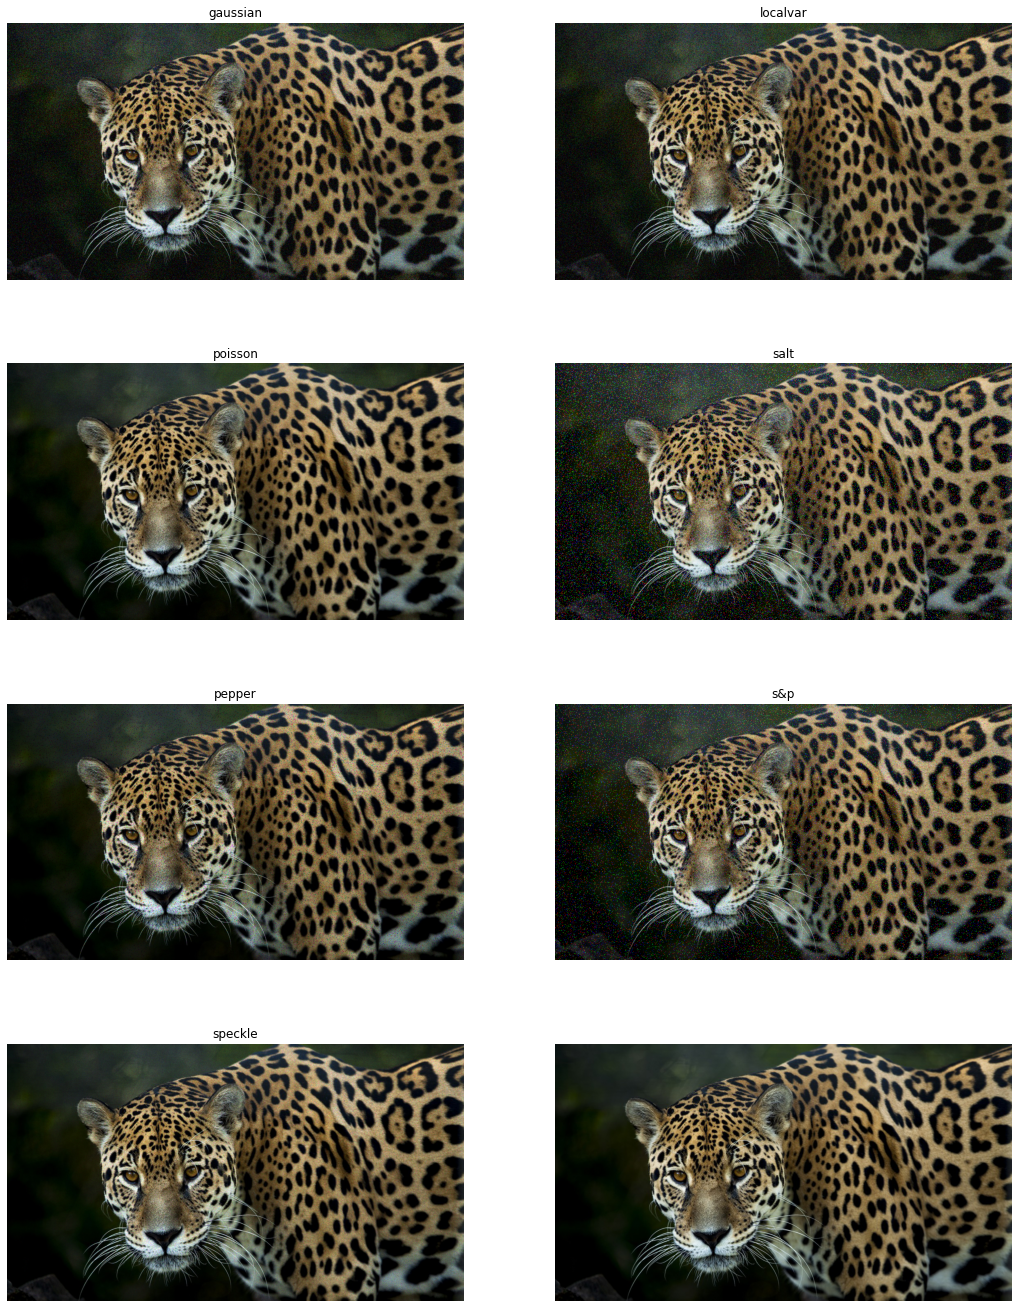

In [56]:
import skimage.io
import matplotlib.pyplot as plt
img_path="ois.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


Il y'a plusieurs fonction d'élimination de bruit avec skimage pour restaurer les images bruitées citons :

* skimage.restoration.denoise_bilateral(image) Denoise image using bilateral filter.

* skimage.restoration.denoise_nl_means(image) Perform non-local means denoising on 2-D or 3-D grayscale images, and 2-D RGB images.

* skimage.restoration.denoise_tv_chambolle(image) Perform total-variation denoising on n-dimensional images.

* skimage.restoration.denoise_wavelet(image[, …]) Perform wavelet denoising on an image.

<h1> Bilateral Filter</h1>

(<matplotlib.axes._subplots.AxesSubplot at 0x16e5d0fd700>,
 <matplotlib.image.AxesImage at 0x16e5e3ecdf0>)

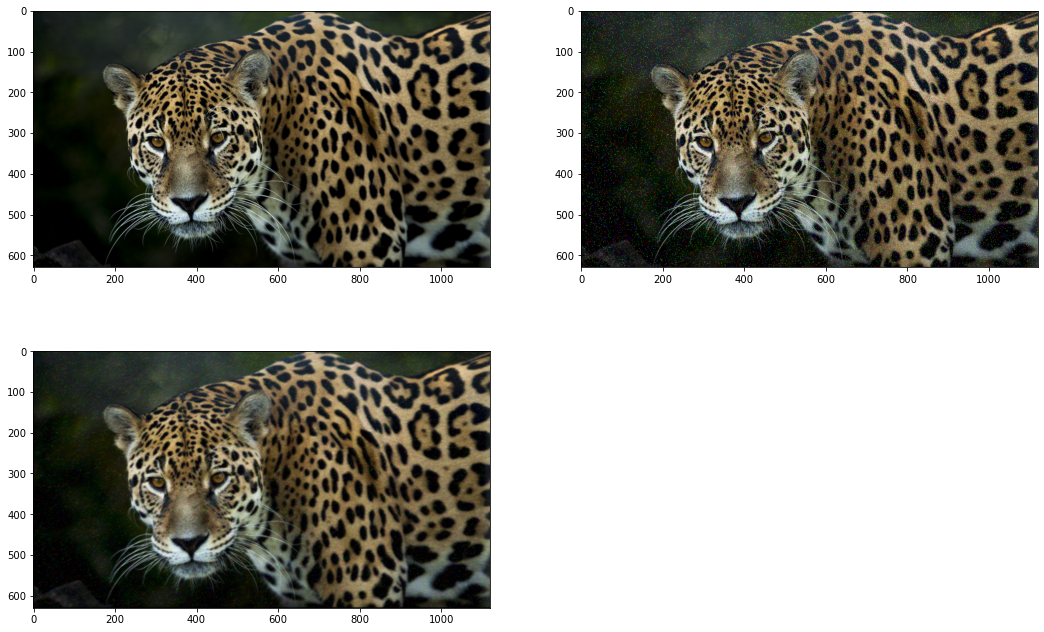

In [70]:
from skimage.restoration import denoise_bilateral
import skimage.io
import matplotlib.pyplot as plt
img_path="ois.jpg"
img = skimage.io.imread(img_path)/255.0
plt.figure(figsize=(18,24))
plt.subplot(4, 2, 1),plt.imshow(img)

# Add noise to the image
spImg = skimage.util.random_noise(img, mode="s&p")
plt.subplot(4, 2, 2),plt.imshow(spImg)

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(spImg, multichannel=True)
plt.subplot(4, 2, 3), plt.imshow(denoised_image)

<h1> Perform wavelet denoising</h1>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.axes._subplots.AxesSubplot at 0x16e5e33c460>,
 <matplotlib.image.AxesImage at 0x16e5d3adbe0>)

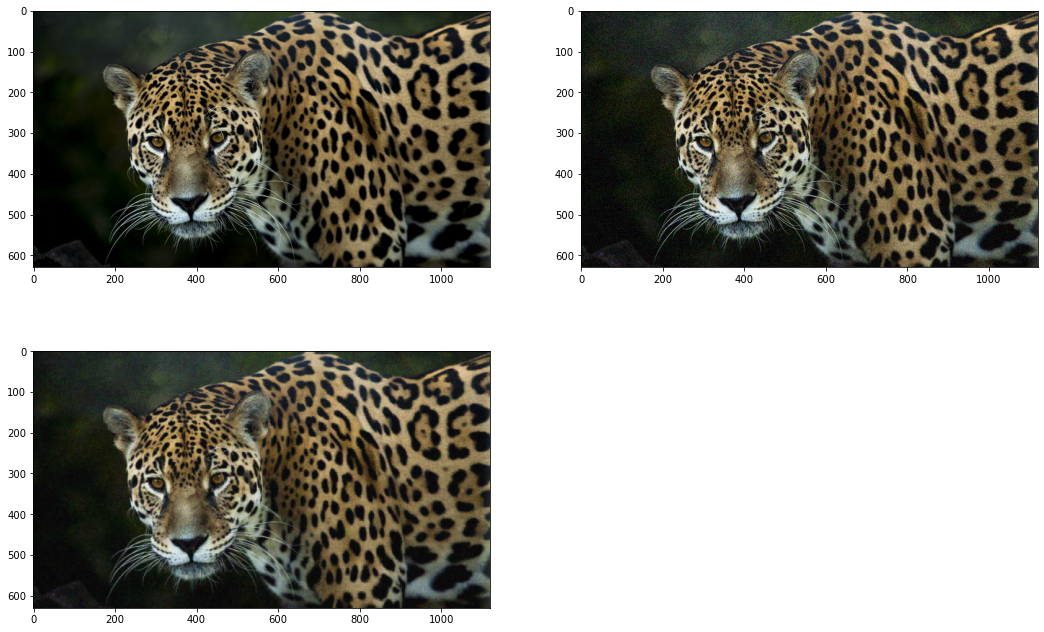

In [69]:
from skimage.restoration import denoise_wavelet
import skimage.io
import matplotlib.pyplot as plt
img_path="ois.jpg"
img = skimage.io.imread(img_path)/255.0
plt.figure(figsize=(18,24))
plt.subplot(4, 2, 1),plt.imshow(img)
# Add noise to the image
gaussimg = skimage.util.random_noise(img, mode="gaussian")
plt.subplot(4, 2, 2),plt.imshow(gaussimg)
# Apply denoise_wavelet filter denoising
denoised_image = denoise_wavelet(gaussimg, sigma=0.1, multichannel=True, rescale_sigma=True)
plt.subplot(4, 2, 3), plt.imshow(denoised_image)

<h1> Perform total-variation denoising</h1>

(<matplotlib.axes._subplots.AxesSubplot at 0x16e5e2aa520>,
 <matplotlib.image.AxesImage at 0x16e01330ca0>)

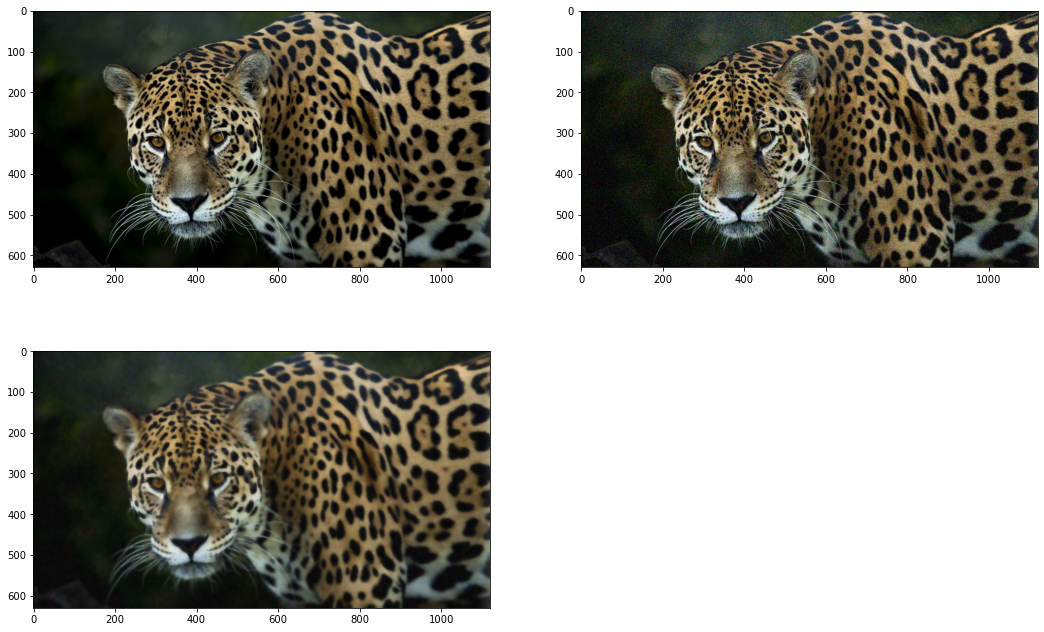

In [73]:
from skimage.restoration import denoise_tv_chambolle
import skimage.io
import matplotlib.pyplot as plt
img_path="ois.jpg"
img = skimage.io.imread(img_path)/255.0
plt.figure(figsize=(18,24))
plt.subplot(4, 2, 1),plt.imshow(img)
# Add noise to the image
limg = skimage.util.random_noise(img, mode="localvar")
plt.subplot(4, 2, 2),plt.imshow(limg)
# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(limg ,weight=0.3,multichannel=True)
plt.subplot(4, 2, 3), plt.imshow(denoised_image)